In [1]:
#for this project  this i have followed allong the a video from the youtube channel, " Computer Science" 



In [2]:
#In this project we are going to predict the stock price of APPLE by the data availble from 2012 t 2020 

In [3]:
# import the libraries 
import math 
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use("fivethirtyeight")

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
# get the data 
df = web.DataReader("GOOGL",data_source="yahoo", start="2012-01-01" , end="2019-12-17")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,334.409424,326.511505,326.796783,333.038025,7345600.0,333.038025
2012-01-04,335.460449,330.640656,332.847839,334.474487,5722200.0,334.474487
2012-01-05,332.317322,328.443451,331.396393,329.834839,6559200.0,329.834839
2012-01-06,330.330322,325.220215,329.904907,325.335327,5380400.0,325.335327
2012-01-09,323.823822,310.925934,323.573578,311.541534,11633500.0,311.541534
...,...,...,...,...,...,...
2019-12-11,1349.890015,1341.099976,1348.300049,1344.250000,1024000.0,1344.250000
2019-12-12,1354.579956,1338.199951,1343.209961,1348.489990,1455700.0,1348.489990
2019-12-13,1351.349976,1341.660034,1347.900024,1346.869995,1658500.0,1346.869995


In [5]:
# shape of our dataframe 
df.shape

(2003, 6)

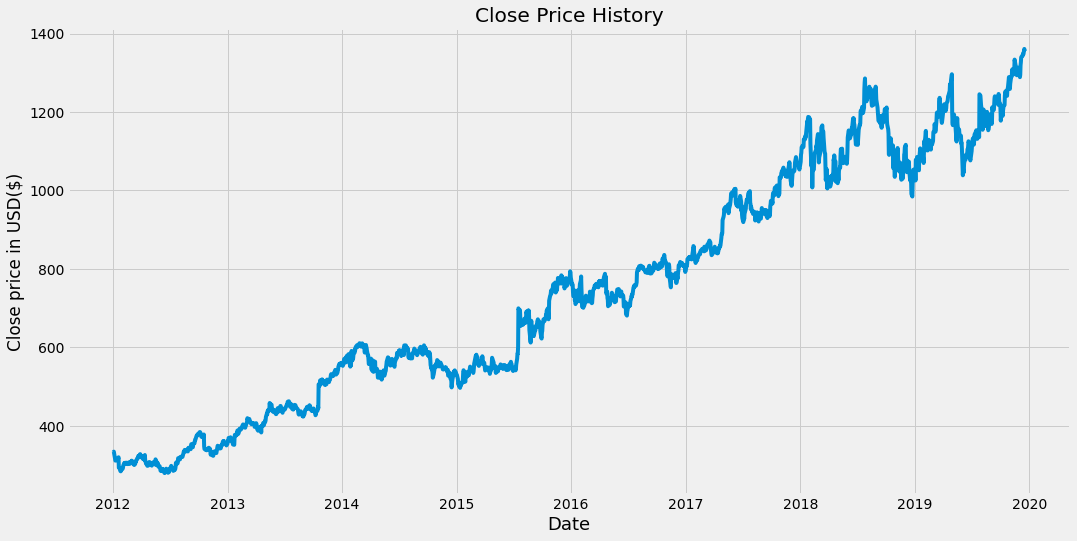

In [6]:
#Visualize the closing price data 
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close price in USD($)")
plt.show()

In [7]:
#create a new dataframe with only "Close" column
data = df.filter(["Close"])
data.head()

,Close
Date,
2012-01-03,333.038025
2012-01-04,334.474487
2012-01-05,329.834839
2012-01-06,325.335327
2012-01-09,311.541534


In [8]:
# convert dataframe to np array
dataset = data.values

In [9]:
# get the no of rows to train the model on 
training_data_len = math.ceil(len(dataset) * 0.8 )

In [10]:
training_data_len

1603

In [11]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(dataset)
scaler_data

array([[0.04924919],
       [0.05057815],
       [0.04628574],
       ...,
       [0.98720509],
       [1.        ],
       [0.99462488]])

In [12]:
# create the training dataset 
# create scaled dataset 
train_data = scaler_data[0:training_data_len, :]
#split the data into xtrain and y train 
X_train = []
Y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  Y_train.append(train_data[i, 0])
  if i <= 60:
    print(X_train)
    print(Y_train)

[array([0.04924919, 0.05057815, 0.04628574, 0.04212297, 0.02936152,
       0.02967641, 0.03098219, 0.03268617, 0.03053302, 0.03219536,
       0.03420031, 0.03728418, 0.01247437, 0.01225672, 0.01013138,
       0.00483416, 0.00419052, 0.00969147, 0.0086311 , 0.00975167,
       0.01008508, 0.01206688, 0.01726223, 0.02317065, 0.02209639,
       0.02352255, 0.02426806, 0.02169818, 0.02461071, 0.02348088,
       0.02153609, 0.02198063, 0.02111011, 0.02544419, 0.02263814,
       0.02179079, 0.02354571, 0.02327252, 0.02747695, 0.02741213,
       0.02933374, 0.02880125, 0.02555995, 0.02125828, 0.02211028,
       0.02226771, 0.01907734, 0.02134625, 0.02719448, 0.02636565,
       0.02874569, 0.03055617, 0.03469578, 0.0344689 , 0.03747403,
       0.04028471, 0.03868257, 0.04180348, 0.04073385, 0.04478086])]
[0.04137749326825896]


In [14]:
# convert  x_trai and y_train to numpy 
X_train, Y_train = np.array(X_train),np.array(Y_train)

In [18]:
#reshape the data 
# LSTM expects the data to be in 3 dimensionals
X_train =np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1543, 60, 1)

In [20]:
#Build the LSTM
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (X_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))

model.add(Dense(25))
model.add(Dense(1))

In [21]:
#Compile the model 
model.compile(optimizer="adam", loss = "mean_squared_error")

In [23]:
# train the data
model.fit(X_train, Y_train, batch_size=1,epochs= 1)

1543/1543 [==============================] - 35s 22ms/step - loss: 0.0013


In [24]:
# create a testing dataset 
# create a new array containing scaled values from index 1502- 2003
test_data = scaler_data[training_data_len-60: :]


# create the data sets X_test and Y_test
X_test = []
Y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i, 0])

In [25]:
# convert the data to a numpy array\
X_test = np.array(X_test)

In [26]:
# reshape the test data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [27]:
# models predicted price values
# predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

In [30]:
# getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-Y_test)**2)
rmse

0.6427432250976562

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


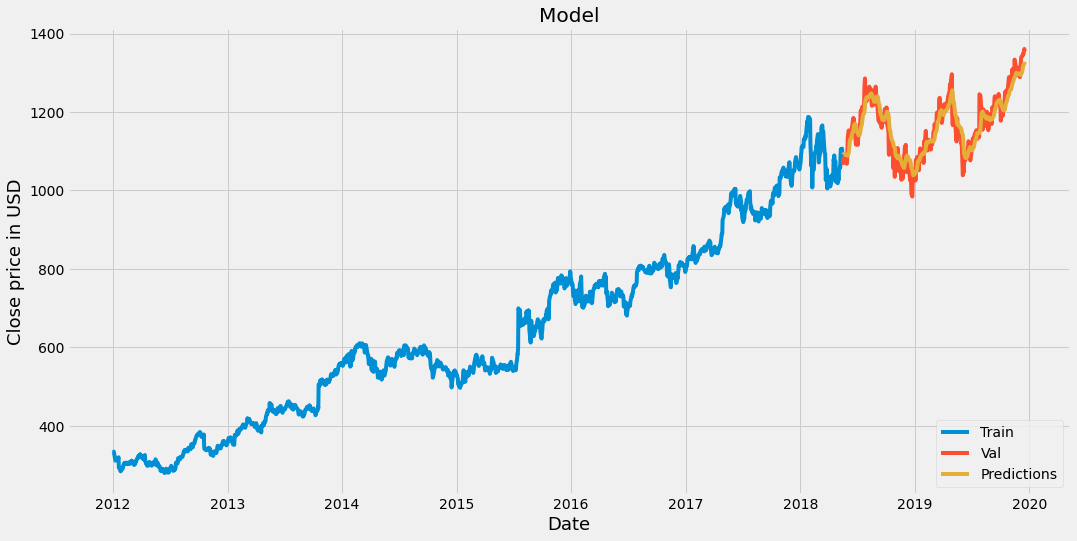

In [34]:
 # plot the data 
 train = data[:training_data_len]
 valid = data[training_data_len:]
 valid["Predictions"] = predictions

 #visualize the model 
 plt.figure(figsize=(16,8))
 plt.title("Model")
 plt.xlabel("Date", fontsize = 18)
 plt.ylabel("Close price in USD", fontsize = 18)
 plt.plot(train["Close"])
 plt.plot(valid[["Close", "Predictions"]])
 plt.legend(["Train", "Val", "Predictions"], loc = "lower right")
 plt.show()

